In [80]:
%matplotlib inline
#  work flow
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
import scipy.stats as stats
# Visualization
from matplotlib import pyplot as plt
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
# Modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [63]:
original_data = pd.read_csv("train.csv")
work_data = original_data.copy()
work_data.drop('id',axis=1,inplace=True)

# Data fields - Info pulled from Kaggle

- id - id of the creature
- bone_length - average length of bone in the creature, normalized between 0 and 1
- rotting_flesh - percentage of rotting flesh in the creature
- hair_length - average hair length, normalized between 0 and 1
- has_soul - percentage of soul in the creature
- color - dominant color of the creature: 'white','black','clear','blue','green','blood'
- type - target variable: 'Ghost', 'Goblin', and 'Ghoul'

Quick overview

In [64]:
work_data.head(), work_data.shape

(   bone_length  rotting_flesh  hair_length  has_soul  color    type
 0     0.354512       0.350839     0.465761  0.781142  clear   Ghoul
 1     0.575560       0.425868     0.531401  0.439899  green  Goblin
 2     0.467875       0.354330     0.811616  0.791225  black   Ghoul
 3     0.776652       0.508723     0.636766  0.884464  black   Ghoul
 4     0.566117       0.875862     0.418594  0.636438  green   Ghost, (371, 6))

## Type of Variable
    Predictor Variable (features)
       - bone_length
       - rotting_flesh
       - hair_length
       - has_soul
       - color
    Target Variable (target)
       - type

## Data Type
    Numeric
    - bone_length
    - rotting_flesh
    - hair_length
    - has_soul
    
    Character
    - color
    - type
    
## Variable Category
    Continuous
    - bone_length
    - rotting_flesh
    - hair_length
    - has_soul
    Categorical
    - color
    - type

Univariate Analysis

In [7]:
work_data.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


/Users/milo1226/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11a007d10>,
 'caps': [<matplotlib.lines.Line2D at 0x11a01ac10>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a03cf10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11a03c8d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11a007f10>,
  <matplotlib.lines.Line2D at 0x119da7490>]}

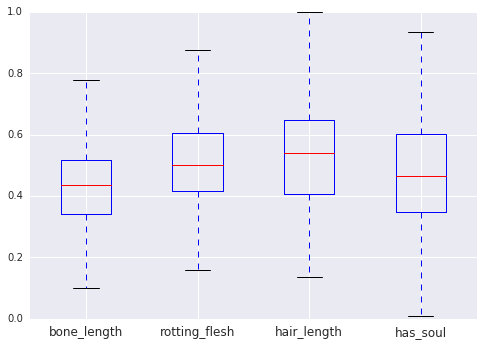

In [65]:
work_data.boxplot()

### There is some indication that there may be outliers within bone_length and rotting_flesh

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108d09750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10903ffd0>]], dtype=object)

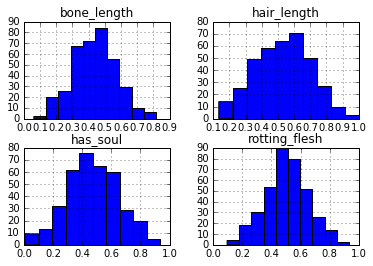

In [9]:
work_data[['bone_length','rotting_flesh','hair_length','has_soul']].hist()

### The continuous variable seem to be normally distributed.

### Frequency Data 

In [10]:
print work_data['type'].value_counts(),'\n' ,work_data['color'].value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64 
white    137
clear    120
green     42
black     41
blue      19
blood     12
Name: color, dtype: int64


In [11]:
print work_data['type'].value_counts() / len(work_data['type']),'\n' ,
work_data['color'].value_counts() / len(work_data['color'])

Ghoul     0.347709
Goblin    0.336927
Ghost     0.315364
Name: type, dtype: float64 


white    0.369272
clear    0.323450
green    0.113208
black    0.110512
blue     0.051213
blood    0.032345
Name: color, dtype: float64

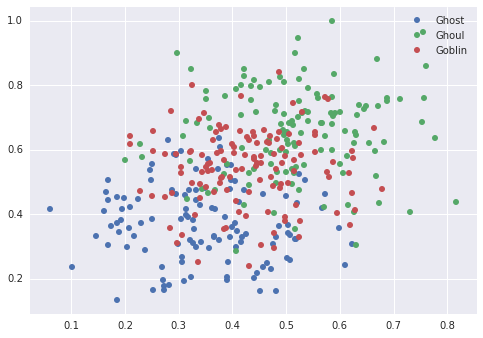

In [67]:
type_group = work_data.groupby('type')
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in type_group:
    ax.plot(group.bone_length, 
            group.hair_length, 
            marker = 'o', 
            linestyle='', 
            ms=6, 
            label = name)
ax.legend()

In [13]:
help(scatter_matrix)

Help on function scatter_matrix in module pandas.tools.plotting:

scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwds)
    Draw a matrix of scatter plots.
    
    Parameters
    ----------
    frame : DataFrame
    alpha : float, optional
        amount of transparency applied
    figsize : (float,float), optional
        a tuple (width, height) in inches
    ax : Matplotlib axis object, optional
    grid : bool, optional
        setting this to True will show the grid
    diagonal : {'hist', 'kde'}
        pick between 'kde' and 'hist' for
        either Kernel Density Estimation or Histogram
        plot in the diagonal
    marker : str, optional
        Matplotlib marker type, default '.'
    hist_kwds : other plotting keyword arguments
        To be passed to hist function
    density_kwds : other plotting keyword arguments
        To be passed to kernel density estimate plot

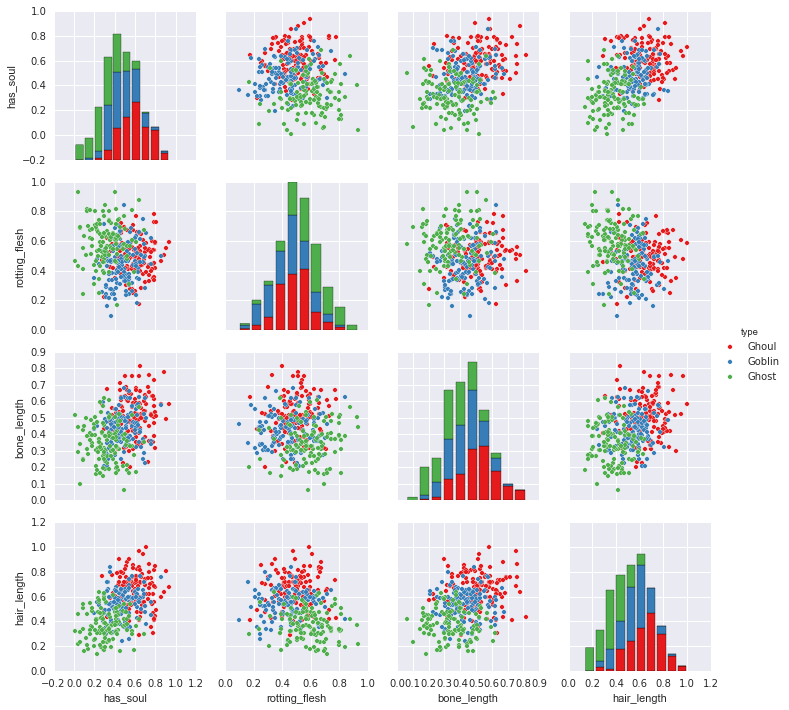

In [66]:
# Seaborn plot used to replace 
# scatter_matrix(work_data[['has_soul','rotting_flesh','bone_length', 'hair_length']], 
#                alpha=0.2, 
#                figsize=(8,8), 
#                diagonal='hist')
sns.set()
sns.pairplot(work_data[['type','has_soul','rotting_flesh','bone_length', 'hair_length']],
            hue='type',
            palette='Set1',
            diag_kind='hist')

In [68]:
work_data.corr()

,bone_length,rotting_flesh,hair_length,has_soul
bone_length,1.000000,-0.041716,0.353881,0.381675
rotting_flesh,-0.041716,1.000000,-0.220353,-0.132051
hair_length,0.353881,-0.220353,1.000000,0.474835
has_soul,0.381675,-0.132051,0.474835,1.000000


#### Correlations to take note of:
- has_soul | bone_length
- has_soul | hair_length
- rotting_flesh | hair_length
- hair_length | bone_length

In [19]:
# I have not been able to find anything definiative as to whether I need to normalize the percentage data. 
# rotting_flesh_max = work_data['rotting_flesh'].max()
# rotting_flesh_min = work_data['rotting_flesh'].min()
# rotting_flesh_difference = rotting_flesh_max - rotting_flesh_min
# work_data['rotting_flesh_norm'] = work_data['rotting_flesh'].apply(lambda x: (x - rotting_flesh_min)/(rotting_flesh_difference))

In [57]:
help(original_data.boxplot)

Help on method boxplot in module pandas.core.frame:

boxplot(self, column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, **kwds) method of pandas.core.frame.DataFrame instance
    Make a box plot from DataFrame column optionally grouped by some columns or
    other inputs
    
    Parameters
    ----------
    data : the pandas object holding the data
    column : column name or list of names, or vector
        Can be any valid input to groupby
    by : string or sequence
        Column in the DataFrame to group by
    ax : Matplotlib axes object, optional
    fontsize : int or string
    rot : label rotation angle
    figsize : A tuple (width, height) in inches
    grid : Setting this to True will show the grid
    layout : tuple (optional)
        (rows, columns) for the layout of the plot
    return_type : {'axes', 'dict', 'both'}, default 'dict'
        The kind of object to return. 'dict' returns a dictionary
        whose val

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f17f5d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12026a410>]], dtype=object)

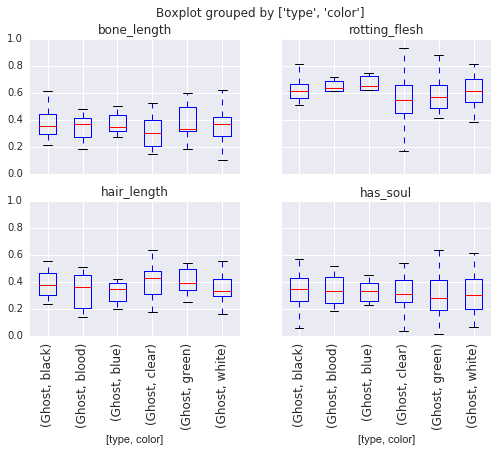

In [73]:
# color_group.get_group('Ghost').groupby('color').boxplot(figsize=(10,10))
work_data[work_data.type == 'Ghost'].boxplot(column=['bone_length','rotting_flesh','hair_length','has_soul'],
                                                 by=['type','color'],
                                                 rot=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e2824d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120d93f10>]], dtype=object)

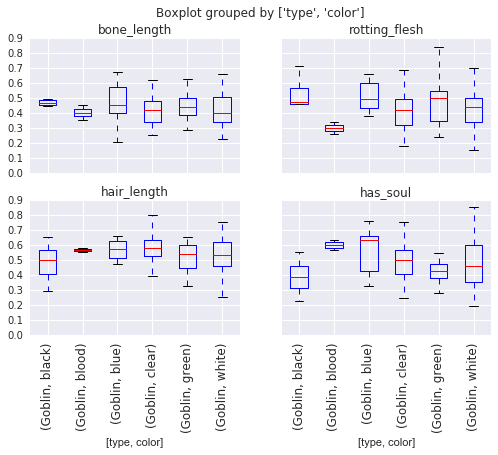

In [74]:
work_data[work_data.type == 'Goblin'].boxplot(column=['bone_length','rotting_flesh','hair_length','has_soul'],
                                              by=['type','color'], 
                                              rot=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121e9ad90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1222122d0>]], dtype=object)

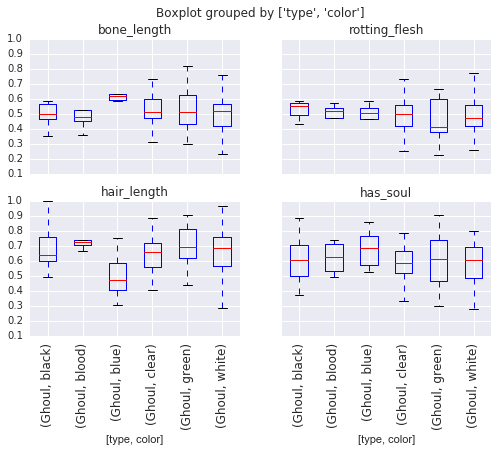

In [75]:
work_data[work_data.type == 'Ghoul'].boxplot(column=['bone_length','rotting_flesh','hair_length','has_soul'],
                                              by=['type','color'], 
                                              rot=90)

#### Encode labels

In [76]:
lu_color = preprocessing.LabelEncoder() 
lu_type = preprocessing.LabelEncoder() 
work_data.color = lu_color.fit_transform(work_data.color)
work_data.type = lu_type.fit_transform(work_data.type)

In [77]:
features = work_data[['bone_length','rotting_flesh','hair_length','has_soul','color']]
classifier = work_data['type']
fTrain, fTest, cTrain, cTest = train_test_split(features, classifier,test_size = .25)

In [78]:
knn = KNeighborsClassifier(n_neighbors = 4)  # create k-neighbors object
knn.fit(fTrain,cTrain)                       # train object
prediction = knn.predict(fTest)              # predict test data

In [81]:
metrics.accuracy_score(cTest,prediction)

0.74193548387096775

Consider using dummy variables in the next iteration: http://chrisalbon.com/python/pandas_convert_categorical_to_dummies.html

For the next iteration, 
    - use dummy variables on the color column.
    - find combination of correlated continuous features for new feature generation
        - also consider the use of clustering, principal component analysis, and matrix factorization